# Stock Market Analysis and Close Price Prediction

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv('all_data.csv', index_col='Date', infer_datetime_format=True)

In [3]:
all_data

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
26-05-2020  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
26-05-2020   821.90   842.70   821.00   825.55     783.84   4335209.0   
26-05-2020   125.85   128.00   125.00   127.25      93.57   6182999.0   
26-05-2020   857.00   871.75   848.75   852.40     829.46  19002576.0   
26-05-2020   296.05   297.90   290.00   292.70     290.10  46681705.0   
...             ...      ...      ...      ...        ...         ...   
24-05-2023  2200.00  2208.50  2176.00  2185.15    2185.15   2648479.0   
24-05-2023  1296.30  1305.00  1291.30  1298.65    1298.65   4824077.0   
24-05-2023  2445.90  2464.00  2433.45  2440.25    2440.25   3743804.0   
24-05-2023    89.10    89.90    88.75    89.65      89.65  19866440.0   
24-05-2023   238.30   241.50   238.00   241.00     241.00   2422138.0   

                  Symbol  
Date                      
26-05-2020   RELIANCE.NS  
26-05-2020         LT.NS  
26-05-2020  COALINDIA.NS  
26-05-2020   HDFCBANK.NS  
26-05-2020  ICICIBANK.NS  
...                  ...  
24-05-2023         LT.NS  
24-05-2023       INFY.NS  
24-05-2023   RELIANCE.NS  
24-05-2023        IOC.NS  
24-05-2023  COALINDIA.NS  

[10458 rows x 7 columns]

In [4]:
all_data.index = pd.to_datetime(all_data.index, format='%d-%m-%Y')

In [5]:
# Sort the DataFrame by the index (Date)
all_data = all_data.sort_index()

In [6]:
all_data

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
2020-05-26   821.90   842.70   821.00   825.55     783.84   4335209.0   
2020-05-26   125.85   128.00   125.00   127.25      93.57   6182999.0   
2020-05-26   857.00   871.75   848.75   852.40     829.46  19002576.0   
2020-05-26   296.05   297.90   290.00   292.70     290.10  46681705.0   
...             ...      ...      ...      ...        ...         ...   
2023-05-24  2200.00  2208.50  2176.00  2185.15    2185.15   2648479.0   
2023-05-24  1296.30  1305.00  1291.30  1298.65    1298.65   4824077.0   
2023-05-24  2445.90  2464.00  2433.45  2440.25    2440.25   3743804.0   
2023-05-24    89.10    89.90    88.75    89.65      89.65  19866440.0   
2023-05-24   238.30   241.50   238.00   241.00     241.00   2422138.0   

                  Symbol  
Date                      
2020-05-26   RELIANCE.NS  
2020-05-26         LT.NS  
2020-05-26  COALINDIA.NS  
2020-05-26   HDFCBANK.NS  
2020-05-26  ICICIBANK.NS  
...                  ...  
2023-05-24         LT.NS  
2023-05-24       INFY.NS  
2023-05-24   RELIANCE.NS  
2023-05-24        IOC.NS  
2023-05-24  COALINDIA.NS  

[10458 rows x 7 columns]

In [7]:
all_data['Symbol'].unique()

array(['RELIANCE.NS', 'LT.NS', 'COALINDIA.NS', 'HDFCBANK.NS',
       'ICICIBANK.NS', 'SBIN.NS', 'IOC.NS', 'AXISBANK.NS', 'ONGC.NS',
       'MARUTI.NS', 'WIPRO.NS', 'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS'],
      dtype=object)

In [8]:
all_data.head()

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
2020-05-26   821.90   842.70   821.00   825.55     783.84   4335209.0   
2020-05-26   125.85   128.00   125.00   127.25      93.57   6182999.0   
2020-05-26   857.00   871.75   848.75   852.40     829.46  19002576.0   
2020-05-26   296.05   297.90   290.00   292.70     290.10  46681705.0   

                  Symbol  
Date                      
2020-05-26   RELIANCE.NS  
2020-05-26         LT.NS  
2020-05-26  COALINDIA.NS  
2020-05-26   HDFCBANK.NS  
2020-05-26  ICICIBANK.NS

In [9]:
reliance_data = all_data[all_data['Symbol'] == 'RELIANCE.NS']
reliance_data

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
2020-05-27  1431.00  1454.00  1412.00  1445.55    1431.22  16460756.0   
2020-05-28  1455.00  1479.75  1449.00  1472.25    1457.65  18518271.0   
2020-05-29  1468.00  1472.00  1452.65  1464.40    1449.88  18470390.0   
2020-06-01  1480.00  1538.35  1475.95  1520.35    1505.27  18434012.0   
...             ...      ...      ...      ...        ...         ...   
2023-05-18  2449.55  2457.00  2427.15  2434.05    2434.05   4857531.0   
2023-05-19  2434.05  2445.95  2418.85  2441.95    2441.95   3715280.0   
2023-05-22  2435.00  2466.00  2432.35  2455.00    2455.00   3431208.0   
2023-05-23  2460.65  2468.00  2451.45  2454.55    2454.55   2811473.0   
2023-05-24  2445.90  2464.00  2433.45  2440.25    2440.25   3743804.0   

                 Symbol  
Date                     
2020-05-26  RELIANCE.NS  
2020-05-27  RELIANCE.NS  
2020-05-28  RELIANCE.NS  
2020-05-29  RELIANCE.NS  
2020-06-01  RELIANCE.NS  
...                 ...  
2023-05-18  RELIANCE.NS  
2023-05-19  RELIANCE.NS  
2023-05-22  RELIANCE.NS  
2023-05-23  RELIANCE.NS  
2023-05-24  RELIANCE.NS  

[747 rows x 7 columns]

In [10]:
all_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [11]:
all_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Symbol        object
dtype: object

In [12]:
all_data.describe()

Open          High           Low         Close     Adj Close  \
count  10458.000000  10458.000000  10458.000000  10458.000000  10458.000000   
mean    1462.186145   1478.002767   1445.149186   1461.197475   1438.579027   
std     1897.214549   1917.748442   1874.828876   1895.440458   1885.297979   
min       48.230000     49.600000     47.770000     48.000000     38.380000   
25%      357.600000    362.925000    350.600000    356.362500    350.692500   
50%      876.200000    885.800000    865.400000    874.850000    860.040000   
75%     1748.225000   1763.862500   1726.787500   1743.300000   1715.962500   
max     9650.000000   9769.000000   9451.100000   9527.600000   9527.600000   

             Volume  
count  1.045800e+04  
mean   1.227081e+07  
std    1.500904e+07  
min    3.005200e+04  
25%    3.669557e+06  
50%    7.816610e+06  
75%    1.502044e+07  
max    2.149557e+08

In [13]:
pd.set_option('display.max_columns',28)

In [14]:
# Create pivot table to see each symbol's open and close price side by side
pivot_table = all_data.pivot_table(values=['Open', 'Close'], index='Date', columns=['Symbol'], aggfunc=np.mean)
pivot_table

Close                                                    \
Symbol     AXISBANK.NS COALINDIA.NS HCLTECH.NS HDFCBANK.NS HINDUNILVR.NS   
Date                                                                       
2020-05-26      341.30       127.25     524.00      852.40       1977.80   
2020-05-27      387.00       130.80     530.95      903.65       1998.10   
2020-05-28      390.95       133.90     542.65      945.25       2009.95   
2020-05-29      384.95       141.30     550.25      951.65       2057.35   
2020-06-01      396.95       148.55     559.75      987.65       2108.55   
...                ...          ...        ...         ...           ...   
2023-05-18      914.70       239.60    1079.90     1645.00       2627.55   
2023-05-19      924.05       239.90    1095.35     1646.90       2641.45   
2023-05-22      917.55       238.70    1119.85     1641.05       2638.10   
2023-05-23      916.15       239.30    1107.35     1637.20       2628.30   
2023-05-24      917.70       241.00    1111.95     1615.80       2614.95   

                                                                    \
Symbol     ICICIBANK.NS  INFY.NS IOC.NS    LT.NS MARUTI.NS ONGC.NS   
Date                                                                 
2020-05-26       292.70   680.55  51.43   825.55   5246.15   77.00   
2020-05-27       318.85   705.45  51.70   850.85   5244.40   77.95   
2020-05-28       326.85   707.40  51.80   905.50   5468.35   78.85   
2020-05-29       331.95   691.00  55.47   932.25   5610.80   83.20   
2020-06-01       339.25   699.55  57.43   928.15   5793.60   83.95   
...                 ...      ...    ...      ...       ...     ...   
2023-05-18       946.50  1246.00  86.00  2188.20   9053.30  166.35   
2023-05-19       954.30  1268.90  86.05  2190.05   9105.95  164.90   
2023-05-22       950.35  1292.80  87.15  2216.60   9156.65  165.60   
2023-05-23       953.40  1300.05  89.00  2197.65   9200.70  165.00   
2023-05-24       940.65  1298.65  89.65  2185.15   9270.75  166.25   

                                               Open                          \
Symbol     RELIANCE.NS SBIN.NS WIPRO.NS AXISBANK.NS COALINDIA.NS HCLTECH.NS   
Date                                                                          
2020-05-26     1424.05  151.40   188.80      342.00       125.85     530.00   
2020-05-27     1445.55  158.60   201.25      346.10       127.25     529.70   
2020-05-28     1472.25  158.20   199.35      390.00       130.85     531.00   
2020-05-29     1464.40  161.30   212.80      382.00       133.50     540.00   
2020-06-01     1520.35  170.05   215.05      394.30       142.10     557.00   
...                ...     ...      ...         ...          ...        ...   
2023-05-18     2434.05  574.20   382.60      920.00       242.00    1081.95   
2023-05-19     2441.95  575.15   386.20      920.90       240.00    1088.60   
2023-05-22     2455.00  577.15   395.75      923.00       239.40    1095.35   
2023-05-23     2454.55  581.60   397.65      917.55       238.95    1120.00   
2023-05-24     2440.25  582.70   399.70      911.15       238.30    1099.05   

                                                                            \
Symbol     HDFCBANK.NS HINDUNILVR.NS ICICIBANK.NS  INFY.NS IOC.NS    LT.NS   
Date                                                                         
2020-05-26      857.00       2004.95       296.05   693.00  51.07   821.90   
2020-05-27      859.90       1990.00       296.10   686.05  51.47   831.95   
2020-05-28      920.00       2000.00       322.25   707.00  51.60   855.00   
2020-05-29      944.00       2009.00       322.90   692.50  51.80   893.20   
2020-06-01      975.00       2075.00       339.00   698.75  56.87   944.65   
...                ...           ...          ...      ...    ...      ...   
2023-05-18     1648.00       2665.50       947.95  1258.60  87.60  2230.00   
2023-05-19     1648.00       2628.65       951.45  1256.05  86.00  2192.00   
2023-0

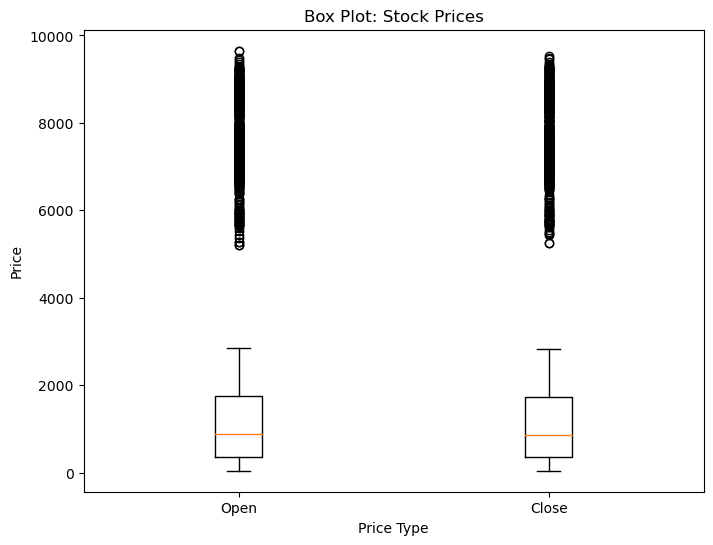

In [15]:
# Select the columns for box plot visualization
columns = ['Open', 'Close']

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(all_data[columns])
plt.title('Box Plot: Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.xticks(range(1, len(columns) + 1), columns) # Set x-axis labels
plt.show()

In [16]:
all_data

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
2020-05-26   821.90   842.70   821.00   825.55     783.84   4335209.0   
2020-05-26   125.85   128.00   125.00   127.25      93.57   6182999.0   
2020-05-26   857.00   871.75   848.75   852.40     829.46  19002576.0   
2020-05-26   296.05   297.90   290.00   292.70     290.10  46681705.0   
...             ...      ...      ...      ...        ...         ...   
2023-05-24  2200.00  2208.50  2176.00  2185.15    2185.15   2648479.0   
2023-05-24  1296.30  1305.00  1291.30  1298.65    1298.65   4824077.0   
2023-05-24  2445.90  2464.00  2433.45  2440.25    2440.25   3743804.0   
2023-05-24    89.10    89.90    88.75    89.65      89.65  19866440.0   
2023-05-24   238.30   241.50   238.00   241.00     241.00   2422138.0   

                  Symbol  
Date                      
2020-05-26   RELIANCE.NS  
2020-05-26         LT.NS  
2020-05-26  COALINDIA.NS  
2020-05-26   HDFCBANK.NS  
2020-05-26  ICICIBANK.NS  
...                  ...  
2023-05-24         LT.NS  
2023-05-24       INFY.NS  
2023-05-24   RELIANCE.NS  
2023-05-24        IOC.NS  
2023-05-24  COALINDIA.NS  

[10458 rows x 7 columns]

In [17]:
# Convert index to datetime format
all_data.index = pd.to_datetime(all_data.index, format='%Y-%m-%d')


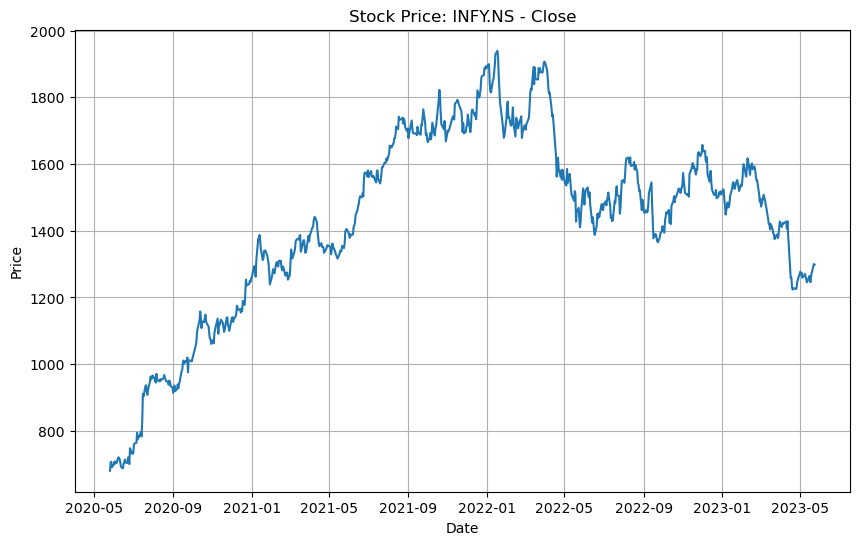

In [18]:
# Select the symbol and column for visualization
symbol = "INFY.NS"
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

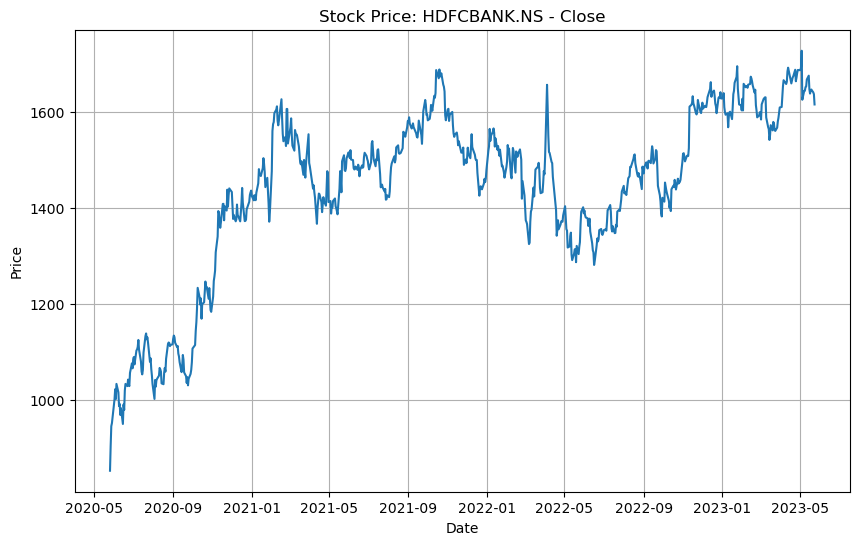

In [19]:
# Select the symbol and column for visualization
symbol = 'HDFCBANK.NS'
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

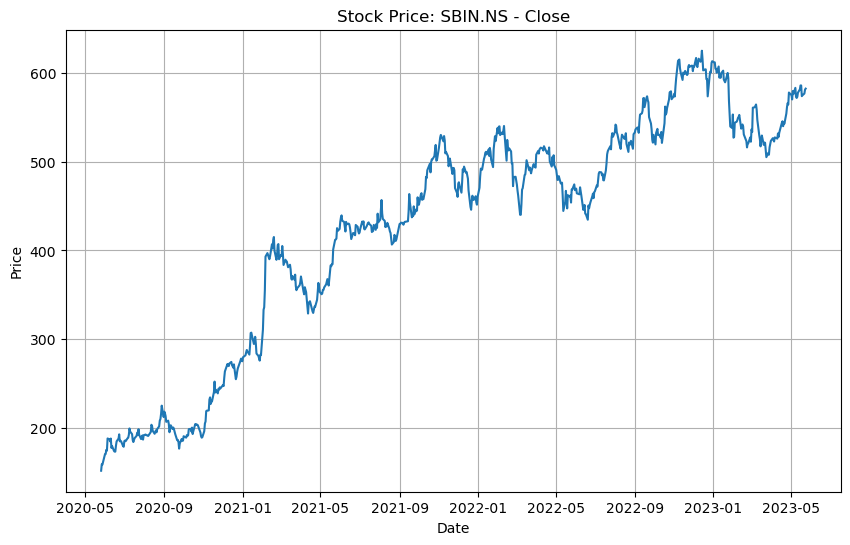

In [20]:
# Select the symbol and column for visualization
symbol = 'SBIN.NS'
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

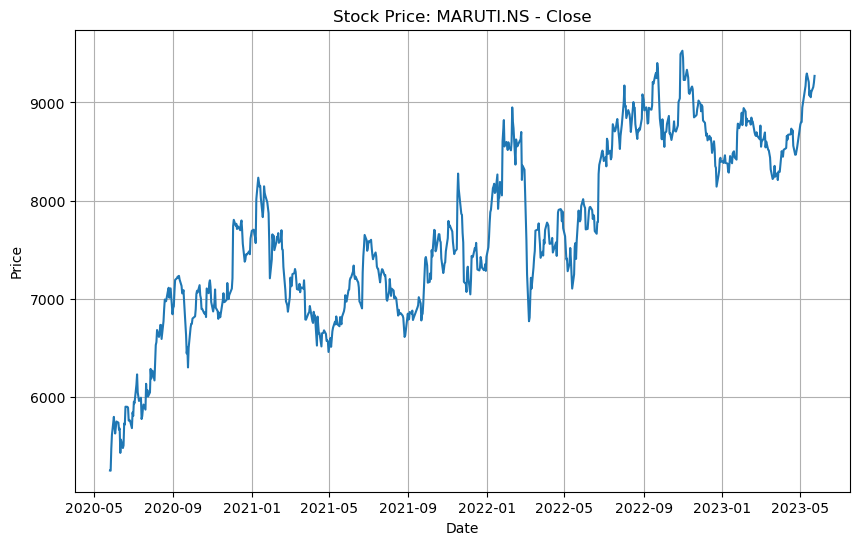

In [21]:
# Select the symbol and column for visualization
symbol = 'MARUTI.NS'
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

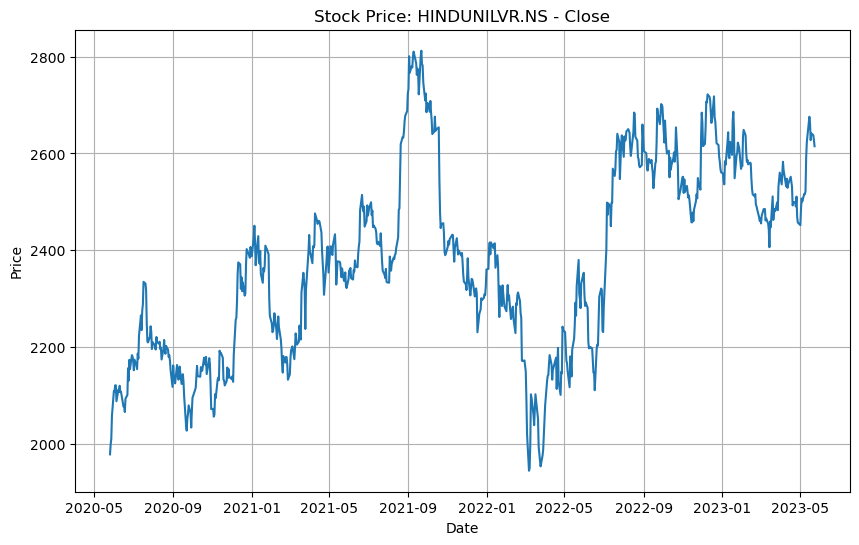

In [22]:
# Select the symbol and column for visualization
symbol = 'HINDUNILVR.NS'
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

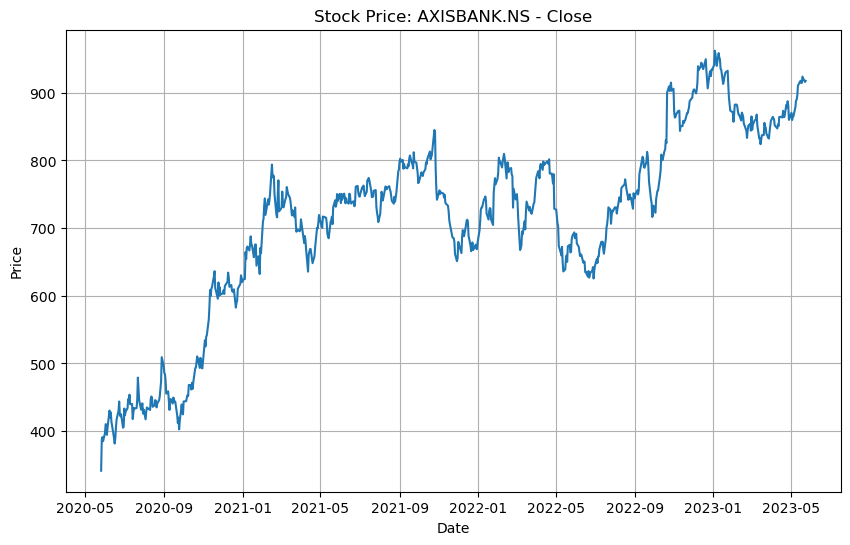

In [23]:
# Select the symbol and column for visualization
symbol = 'AXISBANK.NS'
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

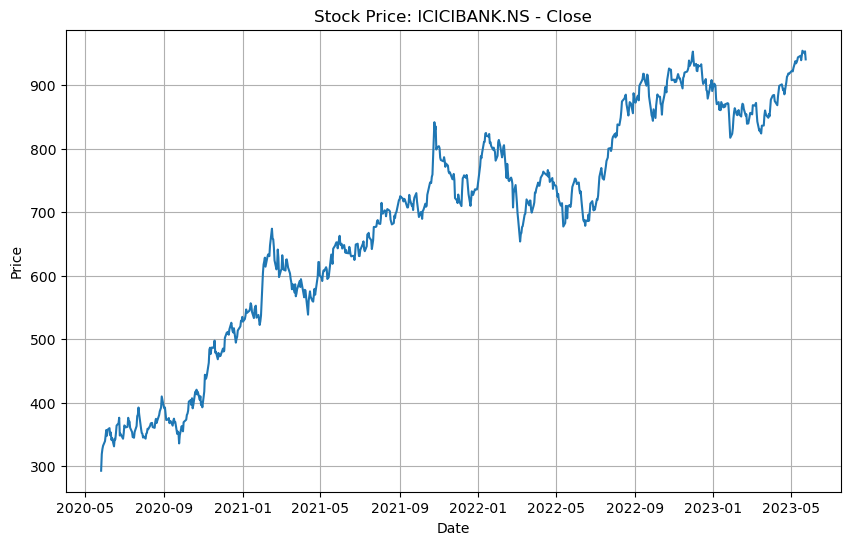

In [24]:
# Select the symbol and column for visualization
symbol = 'ICICIBANK.NS'
column = "Close"

# Filter the data for the selected symbol
symbol_data = all_data[all_data["Symbol"] == symbol]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(symbol_data.index, symbol_data[column])
plt.title('Stock Price: {} - {}'.format(symbol, column))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [25]:
# Perform EDA and feature engineering
all_data['Date'] = all_data.index
all_data['Year'] = all_data['Date'].dt.year
all_data['Month'] = all_data['Date'].dt.month
all_data['Day'] = all_data['Date'].dt.day
all_data['Weekday'] = all_data['Date'].dt.weekday
all_data['WeekOfYear'] = all_data['Date'].dt.weekofyear
all_data['DayOfYear'] = all_data['Date'].dt.dayofyear

In [26]:
all_data

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
2020-05-26   821.90   842.70   821.00   825.55     783.84   4335209.0   
2020-05-26   125.85   128.00   125.00   127.25      93.57   6182999.0   
2020-05-26   857.00   871.75   848.75   852.40     829.46  19002576.0   
2020-05-26   296.05   297.90   290.00   292.70     290.10  46681705.0   
...             ...      ...      ...      ...        ...         ...   
2023-05-24  2200.00  2208.50  2176.00  2185.15    2185.15   2648479.0   
2023-05-24  1296.30  1305.00  1291.30  1298.65    1298.65   4824077.0   
2023-05-24  2445.90  2464.00  2433.45  2440.25    2440.25   3743804.0   
2023-05-24    89.10    89.90    88.75    89.65      89.65  19866440.0   
2023-05-24   238.30   241.50   238.00   241.00     241.00   2422138.0   

                  Symbol       Date  Year  Month  Day  Weekday  WeekOfYear  \
Date                                                                         
2020-05-26   RELIANCE.NS 2020-05-26  2020      5   26        1          22   
2020-05-26         LT.NS 2020-05-26  2020      5   26        1          22   
2020-05-26  COALINDIA.NS 2020-05-26  2020      5   26        1          22   
2020-05-26   HDFCBANK.NS 2020-05-26  2020      5   26        1          22   
2020-05-26  ICICIBANK.NS 2020-05-26  2020      5   26        1          22   
...                  ...        ...   ...    ...  ...      ...         ...   
2023-05-24         LT.NS 2023-05-24  2023      5   24        2          21   
2023-05-24       INFY.NS 2023-05-24  2023      5   24        2          21   
2023-05-24   RELIANCE.NS 2023-05-24  2023      5   24        2          21   
2023-05-24        IOC.NS 2023-05-24  2023      5   24        2          21   
2023-05-24  COALINDIA.NS 2023-05-24  2023      5   24        2          21   

            DayOfYear  
Date                   
2020-05-26        147  
2020-05-26        147  
2020-05-26        147  
2020-05-26        147  
2020-05-26        147  
...               ...  
2023-05-24        144  
2023-05-24        144  
2023-05-24        144  
2023-05-24        144  
2023-05-24        144  

[10458 rows x 14 columns]

<Axes: xlabel='Open', ylabel='Density'>

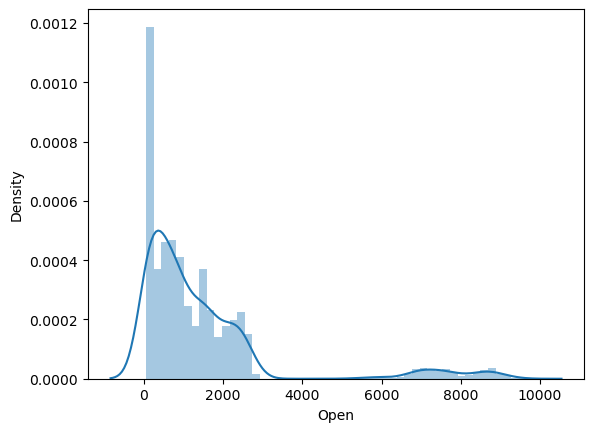

In [27]:
sns.distplot(all_data.Open)

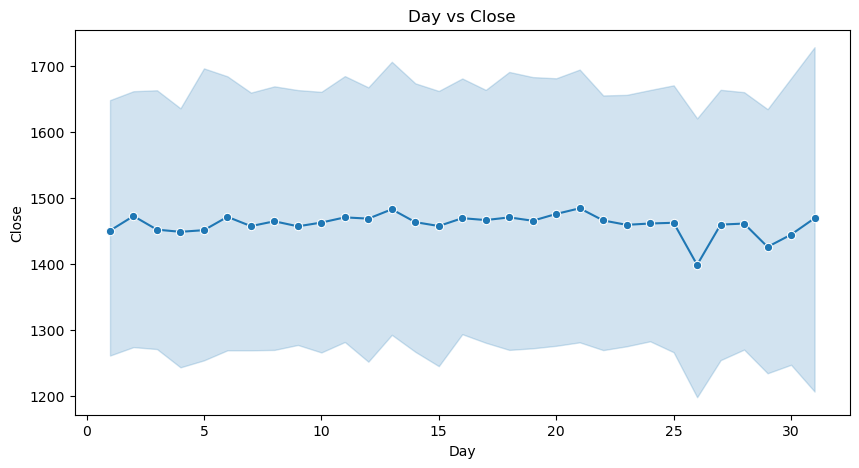

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=all_data, x='Day', y='Close', palette='Black',marker='o')
ax.set_title('Day vs Close')
plt.show()

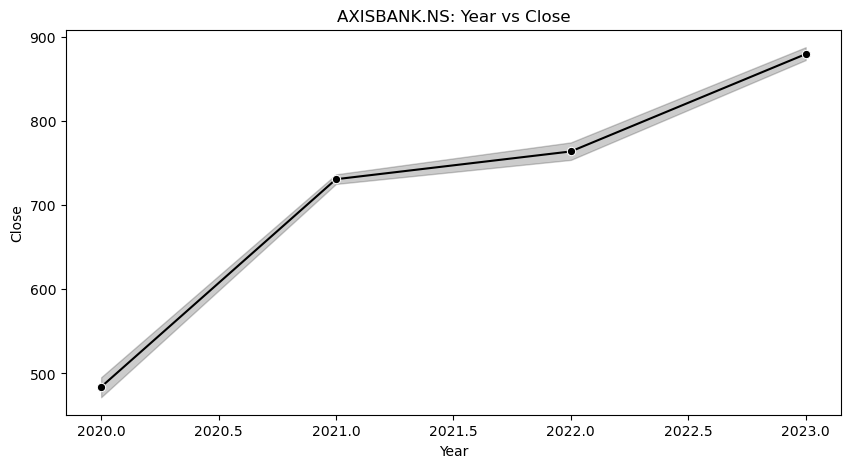

In [29]:
# Filter the data for the "INFY.NS" symbol
infy_data = all_data[all_data['Symbol'] == 'AXISBANK.NS']
# Create the line plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=infy_data, x='Year', y='Close', color='black', marker='o')
ax.set_title('AXISBANK.NS: Year vs Close')
plt.show()

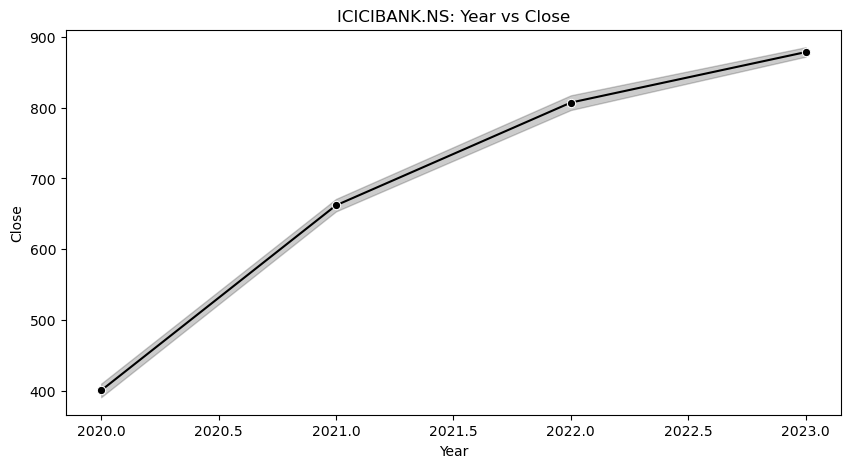

In [30]:
# Filter the data for the "INFY.NS" symbol
infy_data = all_data[all_data['Symbol'] == 'ICICIBANK.NS']
# Create the line plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=infy_data, x='Year', y='Close', color='black', marker='o')
ax.set_title('ICICIBANK.NS: Year vs Close')
plt.show()

In [31]:
# Sort the DataFrame by the index (Date)
all_data = all_data.sort_index()
# Print the sorted DataFrame
all_data

Open     High      Low    Close  Adj Close      Volume  \
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05    1409.93  15329472.0   
2020-05-26   821.90   842.70   821.00   825.55     783.84   4335209.0   
2020-05-26   125.85   128.00   125.00   127.25      93.57   6182999.0   
2020-05-26   857.00   871.75   848.75   852.40     829.46  19002576.0   
2020-05-26   296.05   297.90   290.00   292.70     290.10  46681705.0   
...             ...      ...      ...      ...        ...         ...   
2023-05-24  2200.00  2208.50  2176.00  2185.15    2185.15   2648479.0   
2023-05-24  1296.30  1305.00  1291.30  1298.65    1298.65   4824077.0   
2023-05-24  2445.90  2464.00  2433.45  2440.25    2440.25   3743804.0   
2023-05-24    89.10    89.90    88.75    89.65      89.65  19866440.0   
2023-05-24   238.30   241.50   238.00   241.00     241.00   2422138.0   

                  Symbol       Date  Year  Month  Day  Weekday  WeekOfYear  \
Date                                                                         
2020-05-26   RELIANCE.NS 2020-05-26  2020      5   26        1          22   
2020-05-26         LT.NS 2020-05-26  2020      5   26        1          22   
2020-05-26  COALINDIA.NS 2020-05-26  2020      5   26        1          22   
2020-05-26   HDFCBANK.NS 2020-05-26  2020      5   26        1          22   
2020-05-26  ICICIBANK.NS 2020-05-26  2020      5   26        1          22   
...                  ...        ...   ...    ...  ...      ...         ...   
2023-05-24         LT.NS 2023-05-24  2023      5   24        2          21   
2023-05-24       INFY.NS 2023-05-24  2023      5   24        2          21   
2023-05-24   RELIANCE.NS 2023-05-24  2023      5   24        2          21   
2023-05-24        IOC.NS 2023-05-24  2023      5   24        2          21   
2023-05-24  COALINDIA.NS 2023-05-24  2023      5   24        2          21   

            DayOfYear  
Date                   
2020-05-26        147  
2020-05-26        147  
2020-05-26        147  
2020-05-26        147  
2020-05-26        147  
...               ...  
2023-05-24        144  
2023-05-24        144  
2023-05-24        144  
2023-05-24        144  
2023-05-24        144  

[10458 rows x 14 columns]

In [32]:
# Drop the columns
columns_to_drop = ['Date','Year', 'Month', 'Day', 'Weekday', 'WeekOfYear', 'DayOfYear']
all_data.drop(columns_to_drop, axis=1, inplace=True)

In [33]:
columns_to_drop = ['Adj Close']
all_data.drop(columns_to_drop, axis=1, inplace=True)

In [34]:
all_data

Open     High      Low    Close      Volume        Symbol
Date                                                                    
2020-05-26  1448.15  1449.70  1416.30  1424.05  15329472.0   RELIANCE.NS
2020-05-26   821.90   842.70   821.00   825.55   4335209.0         LT.NS
2020-05-26   125.85   128.00   125.00   127.25   6182999.0  COALINDIA.NS
2020-05-26   857.00   871.75   848.75   852.40  19002576.0   HDFCBANK.NS
2020-05-26   296.05   297.90   290.00   292.70  46681705.0  ICICIBANK.NS
...             ...      ...      ...      ...         ...           ...
2023-05-24  2200.00  2208.50  2176.00  2185.15   2648479.0         LT.NS
2023-05-24  1296.30  1305.00  1291.30  1298.65   4824077.0       INFY.NS
2023-05-24  2445.90  2464.00  2433.45  2440.25   3743804.0   RELIANCE.NS
2023-05-24    89.10    89.90    88.75    89.65  19866440.0        IOC.NS
2023-05-24   238.30   241.50   238.00   241.00   2422138.0  COALINDIA.NS

[10458 rows x 6 columns]

In [35]:
import plotly.graph_objects as go

start_date = "2022-07-01"
end_date = "2023-01-31"
symbol = "RELIANCE.NS"

filtered_data = all_data[(all_data["Symbol"] == symbol) & (start_date <= all_data.index) & (all_data.index <= end_date)]

figure = go.Figure(data=[go.Candlestick(x=filtered_data.index,
                                       open=filtered_data["Open"],
                                       high=filtered_data["High"],
                                       low=filtered_data["Low"],
                                       close=filtered_data["Close"])])
figure.update_layout(title=symbol, xaxis_rangeslider_visible=False)
figure.show()


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [37]:
# Label encode the symbols
le = LabelEncoder()
all_data['Symbol'] = le.fit_transform(all_data['Symbol'])

# Get the mapping of symbol to encoded number
symbol_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the symbol mapping
for symbol, encoded_number in symbol_mapping.items():
    print(f"Symbol: {symbol}, Encoded Number: {encoded_number}")

Symbol: AXISBANK.NS, Encoded Number: 0
Symbol: COALINDIA.NS, Encoded Number: 1
Symbol: HCLTECH.NS, Encoded Number: 2
Symbol: HDFCBANK.NS, Encoded Number: 3
Symbol: HINDUNILVR.NS, Encoded Number: 4
Symbol: ICICIBANK.NS, Encoded Number: 5
Symbol: INFY.NS, Encoded Number: 6
Symbol: IOC.NS, Encoded Number: 7
Symbol: LT.NS, Encoded Number: 8
Symbol: MARUTI.NS, Encoded Number: 9
Symbol: ONGC.NS, Encoded Number: 10
Symbol: RELIANCE.NS, Encoded Number: 11
Symbol: SBIN.NS, Encoded Number: 12
Symbol: WIPRO.NS, Encoded Number: 13


In [38]:
all_data

Open     High      Low    Close      Volume  Symbol
Date                                                              
2020-05-26  1448.15  1449.70  1416.30  1424.05  15329472.0      11
2020-05-26   821.90   842.70   821.00   825.55   4335209.0       8
2020-05-26   125.85   128.00   125.00   127.25   6182999.0       1
2020-05-26   857.00   871.75   848.75   852.40  19002576.0       3
2020-05-26   296.05   297.90   290.00   292.70  46681705.0       5
...             ...      ...      ...      ...         ...     ...
2023-05-24  2200.00  2208.50  2176.00  2185.15   2648479.0       8
2023-05-24  1296.30  1305.00  1291.30  1298.65   4824077.0       6
2023-05-24  2445.90  2464.00  2433.45  2440.25   3743804.0      11
2023-05-24    89.10    89.90    88.75    89.65  19866440.0       7
2023-05-24   238.30   241.50   238.00   241.00   2422138.0       1

[10458 rows x 6 columns]

In [39]:
X = all_data[['Open','High','Volume','Low','Symbol']]
Y = all_data['Close']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=0)

In [41]:
X_train.shape

(7843, 5)

In [42]:
X_test.shape

(2615, 5)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [44]:
regressor.fit(X_train,Y_train)


LinearRegression()

In [45]:
print(regressor.coef_)

[-6.28943460e-01  8.27544142e-01 -1.20864206e-08  8.00760905e-01
 -3.85633357e-02]


In [46]:
predicted=regressor.predict(X_test)


In [47]:
print(X_test)

               Open     High      Volume      Low  Symbol
Date                                                     
2021-06-09   644.40   645.60  15823094.0   628.80       5
2022-11-11  1546.65  1573.50   7214098.0  1546.65       6
2021-03-16  1386.05  1406.00   9352771.0  1380.50       6
2022-05-24  2607.00  2638.00   6243086.0  2597.70      11
2021-01-04   390.00   397.95   9755721.0   387.80      13
...             ...      ...         ...      ...     ...
2021-04-29  1368.00  1369.00   5412357.0  1351.40       6
2022-04-19   544.00   545.55   6643004.0   526.05      13
2022-03-22   183.65   185.80  12372751.0   180.50       1
2020-10-23    51.80    52.83  20601655.0    51.80       7
2023-02-20  2445.00  2449.75   4078245.0  2410.10      11

[2615 rows x 5 columns]


In [48]:
dfr=pd.DataFrame({'Symbol': X_test['Symbol'],'Actual Price':Y_test,'Predicted Price':predicted})
dfr

Symbol  Actual Price  Predicted Price
Date                                             
2021-06-09       5        636.10       632.936868
2022-11-11       6       1570.10      1568.394726
2021-03-16       6       1384.00      1397.717128
2022-05-24      11       2615.85      2623.873936
2021-01-04      13        396.40       394.780225
...            ...           ...              ...
2021-04-29       6       1356.35      1355.195908
2022-04-19      13        530.45       530.811264
2022-03-22       1        183.35       183.432612
2020-10-23       7         52.17        52.931496
2023-02-20      11       2414.40      2419.781011

[2615 rows x 3 columns]

In [49]:
regressor.score(X_test,Y_test)

0.9999559386581951

In [50]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

In [51]:
mse = mean_squared_error(Y_test, predicted)
rmse = np.sqrt(mse)
rmse

12.229690684964757

In [52]:
mae = mean_absolute_error(Y_test, predicted)
r2 = r2_score(Y_test, predicted)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 6.082886282628861
R-squared (R2) Score: 0.9999559386581951


In [53]:
graph=dfr.head(20)

<Axes: xlabel='Date'>

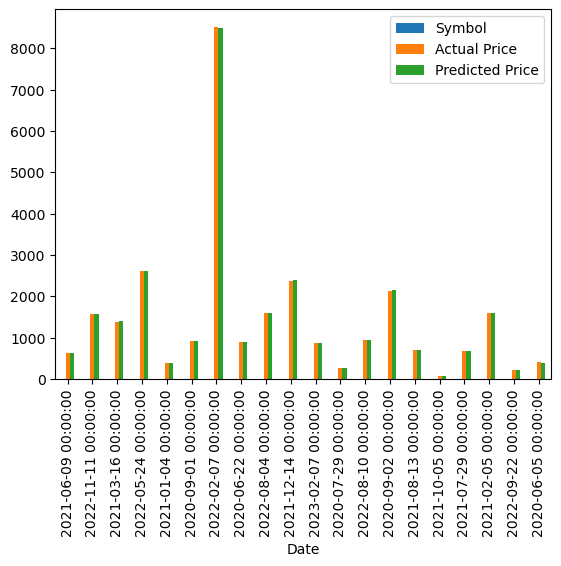

In [54]:
graph.plot(kind='bar')

In [55]:
# Convert the specific date to datetime format
split_date = pd.to_datetime('2022-05-25')

# Split the data into training and testing sets
train_data = all_data[all_data.index < split_date]
test_data = all_data[all_data.index >= split_date]

X_train = train_data.drop(['Close'], axis=1)
Y_train = train_data['Close']
X_test = test_data.drop(['Close'], axis=1)
Y_test = test_data['Close']

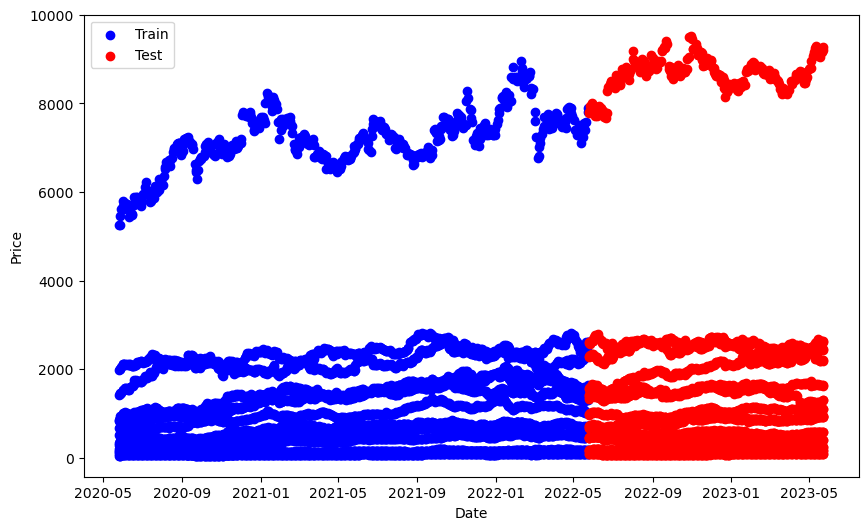

In [56]:
# Visualize the train-test split
plt.figure(figsize=(10, 6))
plt.scatter(X_train.index, Y_train, color='blue', label='Train')
plt.scatter(X_test.index, Y_test, color='red', label='Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
all_data

Open     High      Low    Close      Volume  Symbol
Date                                                              
2020-05-26  1448.15  1449.70  1416.30  1424.05  15329472.0      11
2020-05-26   821.90   842.70   821.00   825.55   4335209.0       8
2020-05-26   125.85   128.00   125.00   127.25   6182999.0       1
2020-05-26   857.00   871.75   848.75   852.40  19002576.0       3
2020-05-26   296.05   297.90   290.00   292.70  46681705.0       5
...             ...      ...      ...      ...         ...     ...
2023-05-24  2200.00  2208.50  2176.00  2185.15   2648479.0       8
2023-05-24  1296.30  1305.00  1291.30  1298.65   4824077.0       6
2023-05-24  2445.90  2464.00  2433.45  2440.25   3743804.0      11
2023-05-24    89.10    89.90    88.75    89.65  19866440.0       7
2023-05-24   238.30   241.50   238.00   241.00   2422138.0       1

[10458 rows x 6 columns]

# Random Forest Regressor

In [58]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ypred = model_rf.predict(X_test)
# Evaluate the performance of the model using various metrics
mae = mean_absolute_error(Y_test, ypred)
mse = mean_squared_error(Y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, ypred)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 14.02984158986189
Mean Squared Error (MSE): 2574.6831449816777
Root Mean Squared Error (RMSE): 50.74133566414741
R-squared (R2) Score: 0.9994221685279119


# XGBRegressor

In [60]:
from xgboost import XGBRegressor
# Define and fit an XGBoost model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
ypred = model_xgb.predict(X_test)
# Evaluate the performance of the model using various metrics
mae = mean_absolute_error(Y_test, ypred)
mse = mean_squared_error(Y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, ypred)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 16.90409907934303
Mean Squared Error (MSE): 2828.6177469639306
Root Mean Squared Error (RMSE): 53.1847510755097
R-squared (R2) Score: 0.9993651784453988


In [62]:
# Create an empty DataFrame to store the predictions
next_30_days_predictions = pd.DataFrame(columns=['Symbol', 'Date', 'Open', 'High', 'Low', 'Close'])

# Iterate over each symbol
for symbol in all_data['Symbol'].unique():
    symbol_data = all_data[all_data['Symbol'] == symbol].drop(['Close'], axis=1)
    
    # Predict the prices for the next 30 days
    symbol_predictions = model_xgb.predict(symbol_data.tail(30))
    
    # Create a DataFrame for the symbol's predictions
    symbol_next_30_days = pd.DataFrame(index=pd.date_range(start=all_data.index[-1], periods=30, freq='D'))
    symbol_next_30_days['Symbol'] = le.inverse_transform([symbol])[0]
    symbol_next_30_days['Date'] = symbol_next_30_days.index
    symbol_next_30_days['Open'] = symbol_predictions
    symbol_next_30_days['High'] = symbol_predictions
    symbol_next_30_days['Low'] = symbol_predictions
    symbol_next_30_days['Close'] = symbol_predictions
    
    # Append the symbol's predictions to the main DataFrame
    next_30_days_predictions = next_30_days_predictions.append(symbol_next_30_days)

    # Reset the index of the DataFrame
    next_30_days_predictions.reset_index(drop=True, inplace=True)

# Print the DataFrame of next 30 days' predicted values for each symbol
next_30_days_predictions


Symbol       Date         Open         High          Low  \
0    RELIANCE.NS 2023-05-24  2345.619873  2345.619873  2345.619873   
1    RELIANCE.NS 2023-05-25  2361.307129  2361.307129  2361.307129   
2    RELIANCE.NS 2023-05-26  2355.568115  2355.568115  2355.568115   
3    RELIANCE.NS 2023-05-27  2368.025879  2368.025879  2368.025879   
4    RELIANCE.NS 2023-05-28  2343.155029  2343.155029  2343.155029   
..           ...        ...          ...          ...          ...   
415      INFY.NS 2023-06-18  1250.666016  1250.666016  1250.666016   
416      INFY.NS 2023-06-19  1260.100464  1260.100464  1260.100464   
417      INFY.NS 2023-06-20  1294.258911  1294.258911  1294.258911   
418      INFY.NS 2023-06-21  1303.967529  1303.967529  1303.967529   
419      INFY.NS 2023-06-22  1303.300415  1303.300415  1303.300415   

           Close  
0    2345.619873  
1    2361.307129  
2    2355.568115  
3    2368.025879  
4    2343.155029  
..           ...  
415  1250.666016  
416  1260.100464  
417  1294.258911  
418  1303.967529  
419  1303.300415  

[420 rows x 6 columns]

In [63]:
next_30_days_predictions.set_index('Date', inplace=True)

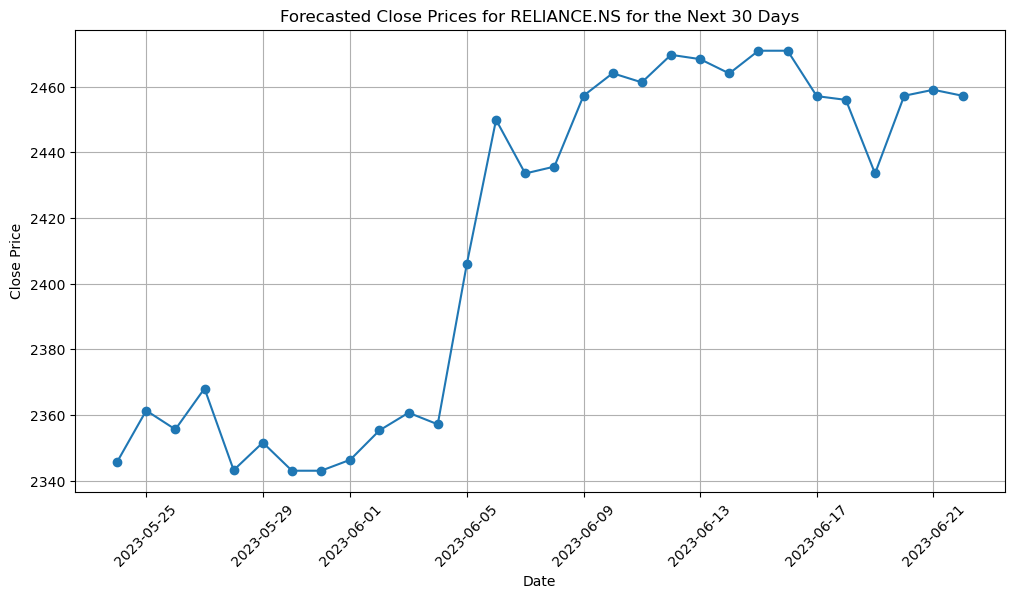

In [64]:
# Filter the predictions for the 'RELIANCE.NS' symbol
reliance_predictions = next_30_days_predictions[next_30_days_predictions['Symbol'] == 'RELIANCE.NS']

# Plot the forecasted close prices for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(reliance_predictions.index, reliance_predictions['Close'], marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Prices for RELIANCE.NS for the Next 30 Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


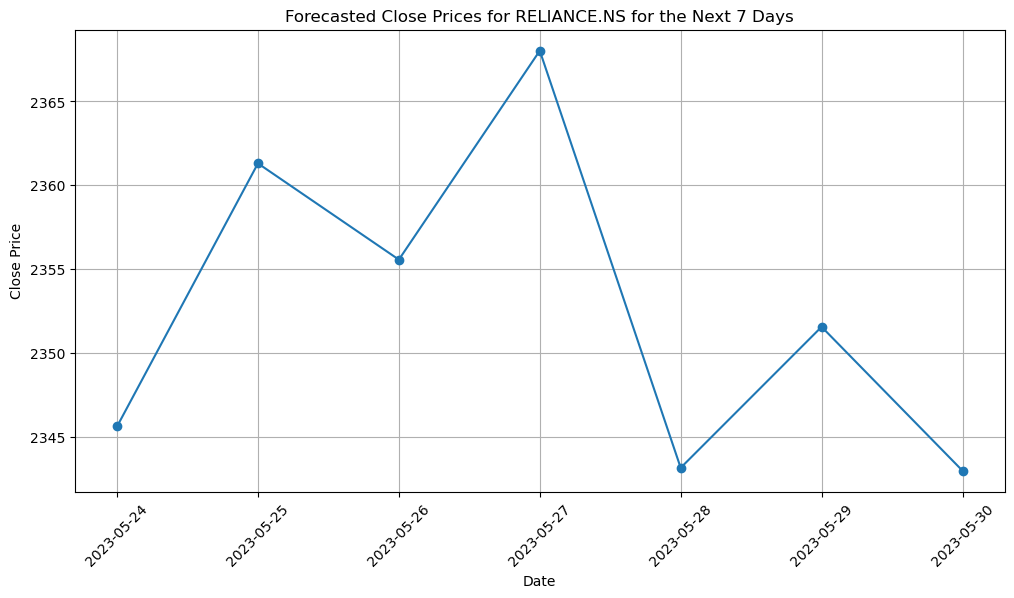

In [65]:
# Filter the predictions for the 'RELIANCE.NS' symbol
reliance_predictions = next_30_days_predictions[next_30_days_predictions['Symbol'] == 'RELIANCE.NS']
# Filter the predictions for the next 7 days
reliance_predictions_7_days = reliance_predictions.head(7)
# Plot the forecasted close prices for the next 7 days
plt.figure(figsize=(12, 6))
plt.plot(reliance_predictions_7_days.index, reliance_predictions_7_days['Close'], marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Prices for RELIANCE.NS for the Next 7 Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


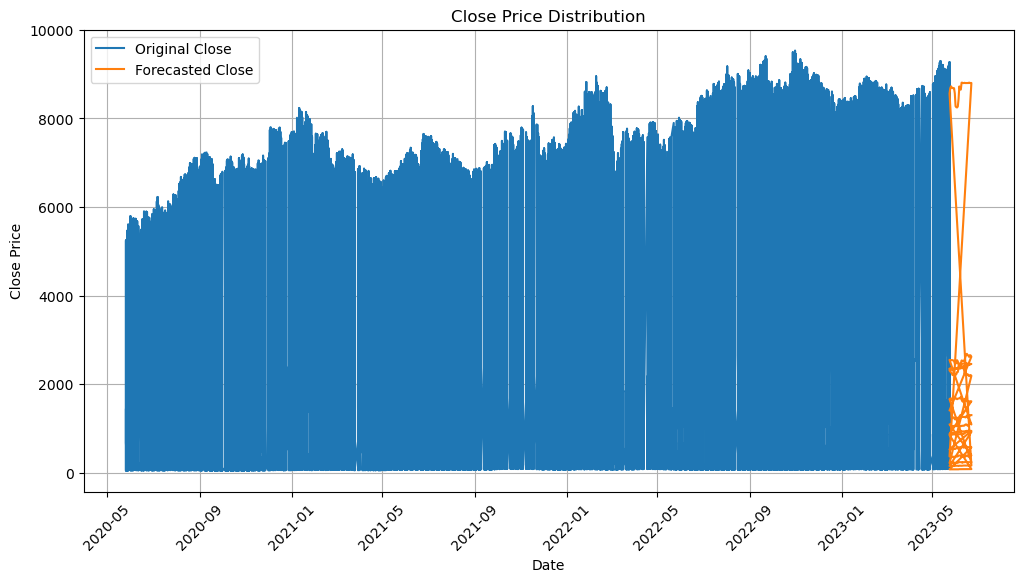

In [66]:
import matplotlib.pyplot as plt

# Plot the close prices vs date for the original dataset
plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data['Close'], label='Original Close')
plt.plot(next_30_days_predictions.index, next_30_days_predictions['Close'], label='Forecasted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Create an empty DataFrame to store the predictions
next_30_days_predictions = pd.DataFrame(columns=['Symbol', 'Date', 'Open', 'High', 'Low', 'Close'])

# Iterate over each symbol
for symbol in all_data['Symbol'].unique():
    symbol_data = all_data[all_data['Symbol'] == symbol].drop(['Close'], axis=1)
    
    # Predict the prices for the next 30 days
    symbol_predictions = model_xgb.predict(symbol_data.tail(30))
    
    # Create a DataFrame for the symbol's predictions
    symbol_next_30_days = pd.DataFrame(index=pd.date_range(start=all_data.index[-1], periods=30, freq='D'))
    symbol_next_30_days['Symbol'] = le.inverse_transform([symbol])[0]
    symbol_next_30_days['Date'] = symbol_next_30_days.index
    symbol_next_30_days['Open'] = symbol_predictions
    symbol_next_30_days['High'] = symbol_predictions
    symbol_next_30_days['Low'] = symbol_predictions
    symbol_next_30_days['Close'] = symbol_predictions
    
    # Append the symbol's predictions to the main DataFrame
    next_30_days_predictions = next_30_days_predictions.append(symbol_next_30_days)

    # Reset the index of the DataFrame
    next_30_days_predictions.reset_index(drop=True, inplace=True)

# Print the DataFrame of next 30 days' predicted values for each symbol
next_30_days_predictions


Symbol       Date         Open         High          Low  \
0    RELIANCE.NS 2023-05-24  2345.619873  2345.619873  2345.619873   
1    RELIANCE.NS 2023-05-25  2361.307129  2361.307129  2361.307129   
2    RELIANCE.NS 2023-05-26  2355.568115  2355.568115  2355.568115   
3    RELIANCE.NS 2023-05-27  2368.025879  2368.025879  2368.025879   
4    RELIANCE.NS 2023-05-28  2343.155029  2343.155029  2343.155029   
..           ...        ...          ...          ...          ...   
415      INFY.NS 2023-06-18  1250.666016  1250.666016  1250.666016   
416      INFY.NS 2023-06-19  1260.100464  1260.100464  1260.100464   
417      INFY.NS 2023-06-20  1294.258911  1294.258911  1294.258911   
418      INFY.NS 2023-06-21  1303.967529  1303.967529  1303.967529   
419      INFY.NS 2023-06-22  1303.300415  1303.300415  1303.300415   

           Close  
0    2345.619873  
1    2361.307129  
2    2355.568115  
3    2368.025879  
4    2343.155029  
..           ...  
415  1250.666016  
416  1260.100464  
417  1294.258911  
418  1303.967529  
419  1303.300415  

[420 rows x 6 columns]

In [69]:
# Assuming you have a DataFrame called 'all_data' with a column named 'Date'
# Set the 'Date' column as the index
next_30_days_predictions.set_index('Date', inplace=True)


In [70]:
next_30_days_predictions

Symbol         Open         High          Low        Close
Date                                                                       
2023-05-24  RELIANCE.NS  2345.619873  2345.619873  2345.619873  2345.619873
2023-05-25  RELIANCE.NS  2361.307129  2361.307129  2361.307129  2361.307129
2023-05-26  RELIANCE.NS  2355.568115  2355.568115  2355.568115  2355.568115
2023-05-27  RELIANCE.NS  2368.025879  2368.025879  2368.025879  2368.025879
2023-05-28  RELIANCE.NS  2343.155029  2343.155029  2343.155029  2343.155029
...                 ...          ...          ...          ...          ...
2023-06-18      INFY.NS  1250.666016  1250.666016  1250.666016  1250.666016
2023-06-19      INFY.NS  1260.100464  1260.100464  1260.100464  1260.100464
2023-06-20      INFY.NS  1294.258911  1294.258911  1294.258911  1294.258911
2023-06-21      INFY.NS  1303.967529  1303.967529  1303.967529  1303.967529
2023-06-22      INFY.NS  1303.300415  1303.300415  1303.300415  1303.300415

[420 rows x 5 columns]

In [71]:

# Create a new DataFrame with the same index as 'next_30_days_predictions'
fut_in = pd.DataFrame(index=next_30_days_predictions.index)

# Extract the Day, Month, and Year into separate columns
fut_in['Day'] = fut_in.index.day
fut_in['Month'] = fut_in.index.month
fut_in['Year'] = fut_in.index.year

# Merge the new DataFrame with 'next_30_days_predictions'
next_30_days_predictions = pd.concat([fut_in, next_30_days_predictions], axis=1)

# Print the updated DataFrame
next_30_days_predictions


Day  Month  Year       Symbol         Open         High  \
Date                                                                  
2023-05-24   24      5  2023  RELIANCE.NS  2345.619873  2345.619873   
2023-05-25   25      5  2023  RELIANCE.NS  2361.307129  2361.307129   
2023-05-26   26      5  2023  RELIANCE.NS  2355.568115  2355.568115   
2023-05-27   27      5  2023  RELIANCE.NS  2368.025879  2368.025879   
2023-05-28   28      5  2023  RELIANCE.NS  2343.155029  2343.155029   
...         ...    ...   ...          ...          ...          ...   
2023-06-18   18      6  2023      INFY.NS  1250.666016  1250.666016   
2023-06-19   19      6  2023      INFY.NS  1260.100464  1260.100464   
2023-06-20   20      6  2023      INFY.NS  1294.258911  1294.258911   
2023-06-21   21      6  2023      INFY.NS  1303.967529  1303.967529   
2023-06-22   22      6  2023      INFY.NS  1303.300415  1303.300415   

                    Low        Close  
Date                                  
2023-05-24  2345.619873  2345.619873  
2023-05-25  2361.307129  2361.307129  
2023-05-26  2355.568115  2355.568115  
2023-05-27  2368.025879  2368.025879  
2023-05-28  2343.155029  2343.155029  
...                 ...          ...  
2023-06-18  1250.666016  1250.666016  
2023-06-19  1260.100464  1260.100464  
2023-06-20  1294.258911  1294.258911  
2023-06-21  1303.967529  1303.967529  
2023-06-22  1303.300415  1303.300415  

[420 rows x 8 columns]

In [72]:
# Convert index to datetime format
next_30_days_predictions.index = pd.to_datetime(next_30_days_predictions.index, format='%Y-%m-%d')

In [73]:
# Forecast Graph of RELIANCE for next 30 days
import plotly.graph_objects as go

start_date = "2023-05-24"
end_date = "2023-06-22"
symbol = "RELIANCE.NS"

filtered_data = next_30_days_predictions[(next_30_days_predictions["Symbol"] == symbol) & (start_date <= next_30_days_predictions.index) & (next_30_days_predictions.index <= end_date)]

figure = go.Figure(data=[go.Candlestick(x=filtered_data.index,
                                       open=filtered_data["Open"],
                                       high=filtered_data["High"],
                                       low=filtered_data["Low"],
                                       close=filtered_data["Close"])])
figure.update_layout(title=symbol, xaxis_rangeslider_visible=False)
figure.show()

In [74]:
# Forecast Graph of RELIANCE for next 30 days
import plotly.graph_objects as go

start_date = "2023-05-24"
end_date = "2023-06-22"
symbol = "INFY.NS"

filtered_data = next_30_days_predictions[(next_30_days_predictions["Symbol"] == symbol) & (start_date <= next_30_days_predictions.index) & (next_30_days_predictions.index <= end_date)]

figure = go.Figure(data=[go.Candlestick(x=filtered_data.index,
                                       open=filtered_data["Open"],
                                       high=filtered_data["High"],
                                       low=filtered_data["Low"],
                                       close=filtered_data["Close"])])
figure.update_layout(title=symbol, xaxis_rangeslider_visible=False)
figure.show()

In [75]:
next_30_days_predictions.head()

Day  Month  Year       Symbol         Open         High  \
Date                                                                  
2023-05-24   24      5  2023  RELIANCE.NS  2345.619873  2345.619873   
2023-05-25   25      5  2023  RELIANCE.NS  2361.307129  2361.307129   
2023-05-26   26      5  2023  RELIANCE.NS  2355.568115  2355.568115   
2023-05-27   27      5  2023  RELIANCE.NS  2368.025879  2368.025879   
2023-05-28   28      5  2023  RELIANCE.NS  2343.155029  2343.155029   

                    Low        Close  
Date                                  
2023-05-24  2345.619873  2345.619873  
2023-05-25  2361.307129  2361.307129  
2023-05-26  2355.568115  2355.568115  
2023-05-27  2368.025879  2368.025879  
2023-05-28  2343.155029  2343.155029

In [76]:
# Function to get the Date and Close Price based on input day, month, year, and symbol
def get_date_close_values(input_day=None, input_month=None, input_year=None, input_symbol=None):
    filtered_df = next_30_days_predictions.copy()
    
    if input_day is not None:
        filtered_df = filtered_df[filtered_df['Day'] == input_day]
    if input_month is not None:
        filtered_df = filtered_df[filtered_df['Month'] == input_month]
    if input_year is not None:
        filtered_df = filtered_df[filtered_df['Year'] == input_year]
    if input_symbol is not None:
        filtered_df = filtered_df[filtered_df['Symbol'] == input_symbol]
    
    return filtered_df[['Day', 'Month', 'Year', 'Close']]

# Example usage
input_day = 25
input_month = 5
input_year = 2023
input_symbol = 'RELIANCE.NS'

# Get the Date and Close values based on the input
date_close_df = get_date_close_values(input_day=input_day, input_month=input_month, input_year=input_year, input_symbol=input_symbol)

# Print the Date and Close values
date_close_df

Day  Month  Year        Close
Date                                     
2023-05-25   25      5  2023  2361.307129

In [77]:
# Function to get the Date and Close Price based on input day, month, year, and symbol
def get_date_close_values(input_day=None, input_month=None, input_year=None, input_symbol=None):
    filtered_df = next_30_days_predictions.copy()
    
    if input_day is not None:
        filtered_df = filtered_df[filtered_df['Day'] == input_day]
    if input_month is not None:
        filtered_df = filtered_df[filtered_df['Month'] == input_month]
    if input_year is not None:
        filtered_df = filtered_df[filtered_df['Year'] == input_year]
    if input_symbol is not None:
        filtered_df = filtered_df[filtered_df['Symbol'] == input_symbol]
    
    return filtered_df[['Day', 'Month', 'Year', 'Close']]

# Example usage
input_day = 25
input_month = 5
input_year = 2023
input_symbol = 'INFY.NS'

# Get the Date and Close values based on the input
date_close_df = get_date_close_values(input_day=input_day, input_month=input_month, input_year=input_year, input_symbol=input_symbol)

# Print the Date and Close values
date_close_df

Day  Month  Year       Close
Date                                    
2023-05-25   25      5  2023  1410.22229